# Simulation du jeux de LIDO simplifié

## Med Attig (AKA MICKY) 2LM3

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

6

### Compléter le code et commenter

In [4]:
A=0
NA=0
S=10
c=0
temp = Roll()
NA+=1
while (temp!=6):
    temp=Roll()
    NA+=1
    print(NA, temp)
print("Sorties apres {} coups".format(NA))

while(A != S):
    temp=Roll()
    if temp+A < S:
        A+=temp
        NA+=1
        print(NA, temp, A)
    elif temp+A > S:
        NA+=1
        print(NA, temp, A)
    else:
        A=S
        NA+=1
        print(NA, temp, A)

Sorties apres 1 coups
2 4 4
3 5 9
4 4 9
5 2 9
6 4 9
7 1 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
def sim(S):
    A=0
    NA=0
    c=0
    temp = Roll()
    NA+=1
    while (temp!=6):
        temp=Roll()
        NA+=1
        
    while(A != S):
        temp=Roll()
        NA+=1
        if temp+A < S:
            A+=temp
            
        elif temp+A > S:
            continue
        else:
            A=S
            
    return NA

In [6]:
L = [sim(30) for i in range(50000)]
Moy=sum(L)/50000
print("estimation de la moyenne de X_30 {}".format(Moy))

estimation de la moyenne de X_30 19.31242


In [7]:
x=list(range(10,20))
y=[sum([sim(u) for i in range(10000)])/10000 for u in x]
print(y)

[13.6334, 13.8337, 14.1447, 14.5121, 14.8906, 15.0156, 15.3498, 15.5986, 15.9363, 16.2469]


In [8]:
import matplotlib.pyplot as plt

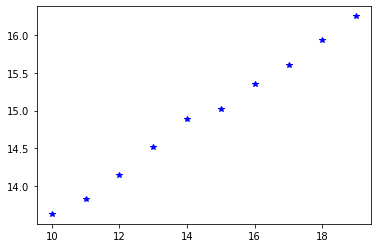

In [9]:
plt.plot(x, y, "b*")
plt.show()

In [10]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [11]:
slope

0.29180181818181816

In [12]:
intercept

10.685043636363636

In [13]:
yy=[slope*u+intercept for u in x]

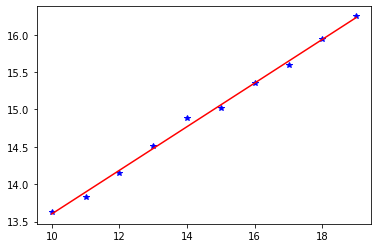

In [14]:
plt.plot(x, y, "b*", x, yy, 'r-')
plt.show()

### Simulation de $10^5$  scénario 

In [15]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [16]:
ESP=Freq.sum()/10**5

In [17]:
x=list(range(10,20))

In [18]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [19]:
import matplotlib.pyplot as plt

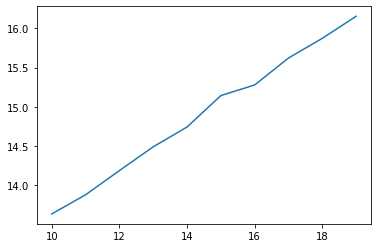

In [20]:
plt.plot(x,y)

In [21]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [22]:
slope

0.2818756363636363

In [23]:
intercept

10.813999272727276